
# Project: Investigate a Dataset - [Medical Appointment No Shows]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> It's about a person who schedules a doctor's appointment, receives all the instructions, but does not show up. 

>Content :

>The file contains 14 columns and 110,527 rows, each representing an appointment. 

>01 - PatientId :
Identification of a patient

>02 - AppointmentID :
Identification of each appointment

>03 - Gender :
Male or Female . Female is the greater proportion, woman takes way more care of they health in comparison to man.

>04 - ScheduledDay :
The day of the actuall appointment, when they have to visit the doctor.

>05 - AppointmentDay
The day someone called or registered the appointment, this is before appointment of course.

>06 - Age:
How old is the patient.

>07 - Neighbourhood :
Where the appointment takes place.

>08 - Scholarship :
True of False

>09 - Hipertension :
True or False

>10 - Diabetes :
True or False

>11 - Alcoholism :
True or False

>12 - Handcap : 
True or False

>13 - SMS_received :
1 or more messages sent to the patient.

>14 - No-show :
True or False.


### Question(s) for Analysis
>What percentage of patients come to appointments and what percentage don't? 

>What is age distribution between gender?

>What is the average of appointments between men and women?

>which men and women miss the most appointment?

>What is the age distribution for appointments? 


In [2]:
# Import of pandas and numpy

import pandas as pd
import numpy as np


<a id='wrangling'></a>
## Data Wrangling



### General Properties


In [3]:
# Loading a csv file and print out a few lines. 
df=pd.read_csv('Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
# getting the dimensionality of the dataframe
df.shape

(110527, 14)

In [5]:
#check column information for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [6]:
#check missing value
sum(df.duplicated())

0

In [7]:
#check data types of the colomuns
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [8]:
#count the unique value of the no-show column
df['No-show'].value_counts()

No     88208
Yes    22319
Name: No-show, dtype: int64

In [9]:
#check the unique value of the no-show column
df['No-show'].unique()

array(['No', 'Yes'], dtype=object)

In [10]:
#check the value in the column age
df['Age'].unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99,  -1])


### Data Cleaning
>Here is a summary of the data wrangling steps performed:

>Standardized Column Names: Converted all column names to lowercase for consistency.

>Categorical Encoding: Transformed no-show into binary format (1 for "Yes", 0 for "No").

>Column Renaming: Renamed columns for clarity.

>Invalid Ages: Identified one record with an invalid (negative) age. This will require manual decision-making (e.g., removal or correction).

>Type Conversion

In [11]:
#Set columns name in a lower case
df.columns = df.columns.str.lower()
df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [12]:
#Convert the `no-show` column to binary (1 for "Yes", 0 for "No")
df['no-show']=df['no-show'].map({'Yes': 1, 'No': 0})
df['no-show']

0         0
1         0
2         0
3         0
4         0
         ..
110522    0
110523    0
110524    0
110525    0
110526    0
Name: no-show, Length: 110527, dtype: int64

In [13]:
#Showing the unique value on the column No-show
df['no-show'].value_counts()

0    88208
1    22319
Name: no-show, dtype: int64

In [14]:
# Rename columns for better readability
df.rename(columns={'patientid': 'patient_id', 'appointmentid': 'appointment_id', 'no-show': 'no_show'}, inplace=True)

In [15]:
# show the result
df.head()

,patient_id,appointment_id,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,0


In [16]:
#Ensure there are no invalid age entries (e.g., negative or excessively large values)
ind = df.query('age<0').index
df.drop(ind,inplace=True)

In [17]:
#Show result
df.age.unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99])

In [18]:
#Show the result of all file
df.head()

,patient_id,appointment_id,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,0


In [19]:
#convert patient_id in int like appointemeny_id
df.patient_id=df.patient_id.astype(int)

In [20]:
# finaly convert patient_id and appointemeny_id in string
df.appointment_id=df.appointment_id.astype(str)
df.patient_id=df.patient_id.astype(str)

In [21]:
#Show result
df.head()

,patient_id,appointment_id,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,29872499824296,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,558997776694438,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,4262962299951,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,867951213174,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,8841186448183,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,0


In [22]:
#Convert `scheduledday` and `appointmentday` to datetime format
df['scheduledday'] = pd.to_datetime(df['scheduledday'])
df['appointmentday'] = pd.to_datetime(df['appointmentday'])

In [23]:
#show result
df.dtypes

patient_id                     object
appointment_id                 object
gender                         object
scheduledday      datetime64[ns, UTC]
appointmentday    datetime64[ns, UTC]
age                             int64
neighbourhood                  object
scholarship                     int64
hipertension                    int64
diabetes                        int64
alcoholism                      int64
handcap                         int64
sms_received                    int64
no_show                         int64
dtype: object

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (What percentage of patients come to appointments and what percentage don't?)

In [24]:
#number of no-show appointments
number_no_show = df.query('no_show == 1').appointment_id.nunique()
number_no_show

22319

In [25]:
#number of show appointments
number_show = df.query('no_show == 0').appointment_id.nunique()
number_show

88207

In [26]:
#total of appointment
total_appointment = df.appointment_id.nunique()
total_appointment

110526

In [27]:
#rate of appointment who show and no-show
def calcul_rate(a,b) :
    return a/b
rate_show = calcul_rate(number_show,total_appointment)
rate_no_show = calcul_rate(number_no_show,total_appointment)

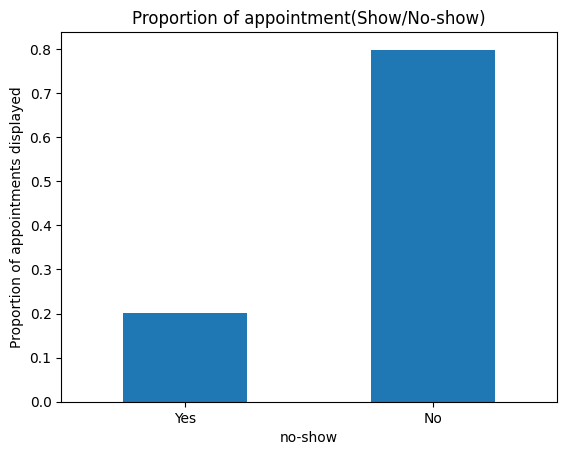

In [28]:
pd.DataFrame(
{'no-show' : ["Yes","No"], "Appointment":[rate_no_show,rate_show]}
).plot(
kind="bar",
x="no-show",
title="Proportion of appointment(Show/No-show)",
legend=False,
xlabel="no-show",
ylabel="Proportion of appointments displayed",
rot=0);

In the context where the 'yes' in the 'no-show' column is considered the absence of the patient at the appointment, It seems that there are more patients who respect the appointment, because the percentage of those who come to the appointment is much higher

### Research Question 2 (What is age distribution between gender?)

In [29]:
# Create two data frame for gender M and F
df_F=df[df['gender'] == 'F']
df_M=df[df['gender'] == 'M']

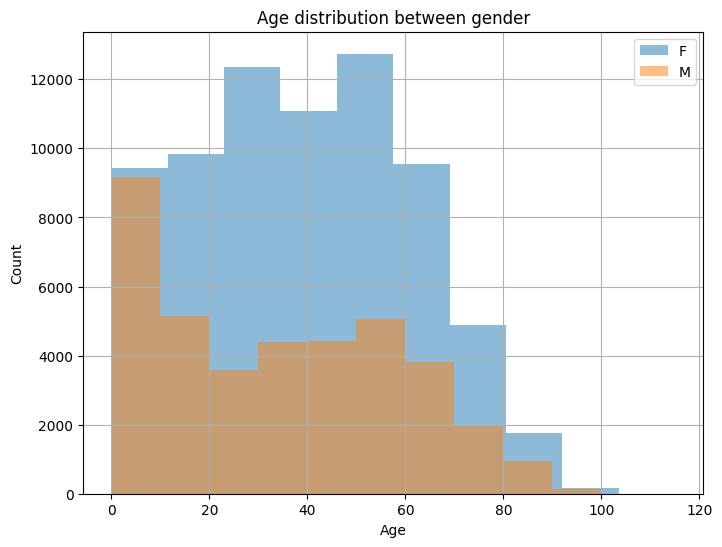

In [30]:
ax = df_F['age'].hist(alpha=0.5, figsize=(8, 6), label='F');
# Layer a new histogram using the same subplot that was returned as 'ax'
df_M['age'].hist(alpha=0.5, figsize=(8, 6), label='M', ax=ax);
# Label the subplot with titles and a legend
ax.set_title('Age distribution between gender')
ax.set_xlabel('Age');
ax.set_ylabel('Count');
ax.legend(loc='upper right');

it's seems that the woman have more appointments in specific age groups like older adults.

### Research Question 3  (What is the average of appointments between men and women?)

In [31]:
#to explore how the no-show differ between genders.
gender= df.groupby('gender').no_show.mean()
gender

gender
F    0.203149
M    0.199679
Name: no_show, dtype: float64

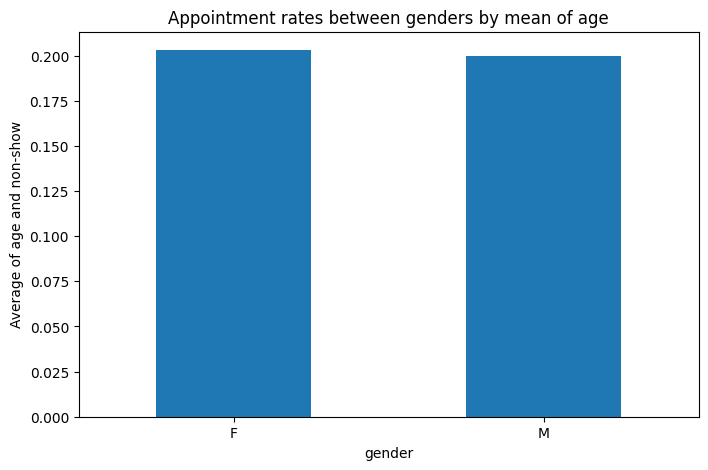

In [32]:
gender.plot(
kind="bar",
title="Appointment rates between genders by mean of age",
xlabel="gender",
ylabel="Average of age and non-show",
legend=False,
rot=0,
figsize=(8, 5));

it's seems that the women have more appointments on average than men

### Research Question 4 (which men and women miss the most appointment?)

In [33]:
# get list of missed appointments
df_no_show = df.query('no_show == 1')
# filter number of missed appointments by gender
gender_no_show= df_no_show.groupby('gender').no_show.value_counts()
gender_no_show

gender  no_show
F       1          14594
M       1           7725
Name: no_show, dtype: int64

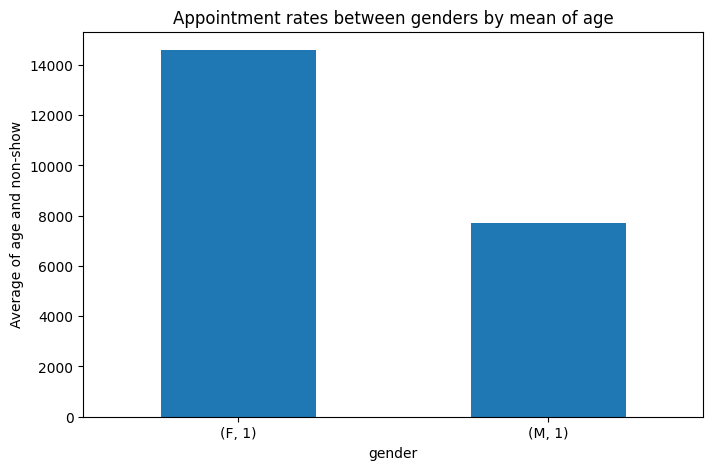

In [34]:
gender_no_show.plot(
kind="bar",
title="Appointment rates between genders by mean of age",
xlabel="gender",
ylabel="Average of age and non-show",
legend=False,
rot=0,
figsize=(8, 5));

We constat that women miss many more appointments than men, which can be explained by the fact that they take more appointments on average than men

### Research Question 4 (What is the age distribution for appointments?)


<AxesSubplot: >

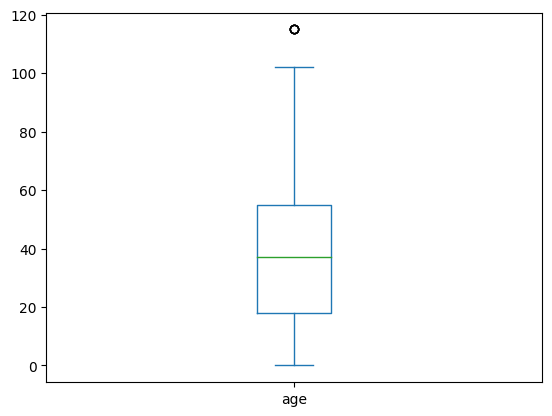

In [35]:
#Age distribution
df.age.plot.box()

More patients over thirty are concerned by the appointments.

<a id='conclusions'></a>
## Conclusions

> Regarding the first question, based on the fact that in the column 'no-show' the 'yes' represents missed appointments, I see that there are many more people who come to the appointment than those who do not. unless the yes in the column is considered as presence.

>One limitation of this analysis is the potential for sample bias. The dataset may not represent the entire population of patients who schedule appointments.

>For the second and third questions, women miss many more appointments than men, which can be explained by the fact that they take more appointments on average than men.

> There are also several factors, but the analysis may not account for temporal factors, such as changes in healthcare policies, seasonal variations in appointment scheduling, or external events (like a pandemic) that could affect attendance rates.

>The analysis focuses on SMS reminders and no-show rates, but may overlook other important variables that may affect attendance, such as socioeconomic status, transportation issues, or the type of appointment.

> more patients in their thirties are concerned by the appointments.

## Submitting your Project 


In [ ]:
# Running this cell will execute a bash command to convert this notebook to an .html file
!python -m nbconvert --to html Investigate_a_Dataset.ipynb